<a href="https://colab.research.google.com/github/Datajacker/Introduction-to-data-science/blob/feature/Module_5_SVM_Assignment_Description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exposition

In this task, we are going to look at the decision boundaries of the SVM algorithm. Different Kernels will allow the algorithm to learn different decision boundary shapes. Kernels are a pretty abstract concept, so it helps to be able to visualize these things.

We will work with 2D data for ease of visualization. The decision boundary is a region of the problem space that divides the data into classes.

# Tools

Import the following modules. The new classifier here is SVC:

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

The SVC algorithm is just what sklearn calls their SVM implementation with the C hyper-parameter. Take note of the "kernel" parameter. That is how you change the Kernel being used.

In [0]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# The Data

We will use synthetic data for this. I want you see what the dataset looks like first. Run the following code to generate the data and add it to a Pandas DataFrame:

In [0]:
# data generation
# make_moons is a functon that generates random data in a moon shape.
# make_moons generates two classes (labeled 0 and 1)
np.random.seed(1337)
features, labels = make_moons(n_samples=1000, noise=0.1)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3)

# makes a training DataFrame
# I do this because it is easier to plot as a dataframe
feature_names = ["feat_1", "feat_2"]
train_df = pd.DataFrame(train_features,
                        columns=feature_names)
train_df["label"] = train_labels

# you will need to plot the test label later
feature_names = ["feat_1", "feat_2"]
test_df = pd.DataFrame(test_features,
                       columns=feature_names)
test_df["label"] = test_labels

Run the following code to plot it. You will want to take notice of this code, as it will be useful for making your plots later on.

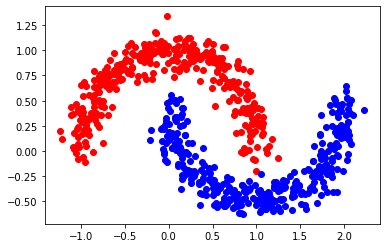

In [3]:
# plot each class separately.
# We are colouring the 0 class red and the 1 class blue.
colors=["red", "blue"]
plt.figure()
for label in set(train_labels):
    cluster_df = train_df.loc[train_df.label==label, feature_names]
    plt.scatter(cluster_df[feature_names[0]],
                cluster_df[feature_names[1]],
                color=colors[label])
plt.show()


# The Task

1) Train an SVM with a linear kernel on the training data set (make sure you don't include the labels in your features!).

2) Train an SVM with a RBF kernel on the training data set.

3) For each model, predict on the test data and print a classification_report.

4) For each model, plot the test data (like a scatter plot, you can borrow the code above) along with the decision boundary (call the add_decision_boundary_to_plot function).

In [0]:
# run this code block to include this function
def add_decision_boundary_to_plot(classifier, min_x, max_x, min_y, max_y):
    """
    Call this after you have started a plot but before you call plt.show()
    
    classifier - a trained model that you want to visualize
    min_x - the minimum x value of the x axis
    max_x - the maximum x value of the x axis
    min_y - the minimum y value of the y axis
    max_y - the maximum y value of the y axis 
    """
    h = 0.1
    xx, yy = np.meshgrid(np.arange(min_x, max_x, h),
                         np.arange(min_y, max_y, h))
    hyperplane = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    
    hyperplane = hyperplane.reshape(xx.shape)
    plt.contourf(xx, yy, hyperplane, cmap=plt.cm.RdBu, alpha=.8)
    plt.show()


In [11]:
## Train an SVM with a linear kernel on the training data set
svclassifier = SVC(kernel= 'linear')
svclassifier.fit(train_features, train_labels)
test_pred = svclassifier.predict(test_features)
print("The classifier report for linear kernel: \n" + classification_report(test_labels, test_pred))
print(confusion_matrix(test_labels, test_pred))

The classifier report for linear kernel: 
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       147
           1       0.85      0.84      0.84       153

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

[[125  22]
 [ 25 128]]


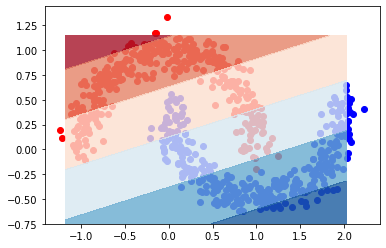

In [25]:
# plot each class separately.
# We are colouring the 0 class red and the 1 class blue.
colors=["red", "blue"]
plt.figure()
for label in set(train_labels):
    cluster_df = train_df.loc[train_df.label==label, feature_names]
    plt.scatter(cluster_df[feature_names[0]],
                cluster_df[feature_names[1]],
                color=colors[label])

# plot the test data (like a scatter plot, you can borrow the code above) along with the decision boundary (call the add_decision_boundary_to_plot function)
add_decision_boundary_to_plot(svclassifier,test_df['feat_1'].min(), test_df['feat_1'].max(), test_df['feat_2'].min(), test_df['feat_2'].max() )

In [14]:
## Train an SVM with a RBF kernel on the training data set
svclassifier_1 = SVC(kernel= 'rbf')
svclassifier_1.fit(train_features, train_labels)
test_pred = svclassifier_1.predict(test_features)
print("The classifier report for rbf kernel: \n" + classification_report(test_labels, test_pred))
print(confusion_matrix(test_labels, test_pred))

The classifier report for rbf kernel: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       147
           1       1.00      0.98      0.99       153

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

[[147   0]
 [  3 150]]


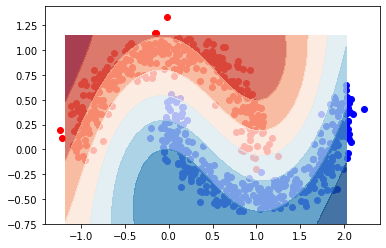

In [26]:
# plot each class separately.
# We are colouring the 0 class red and the 1 class blue.
colors=["red", "blue"]
plt.figure()
for label in set(train_labels):
    cluster_df = train_df.loc[train_df.label==label, feature_names]
    plt.scatter(cluster_df[feature_names[0]],
                cluster_df[feature_names[1]],
                color=colors[label])

# plot the test data (like a scatter plot, you can borrow the code above) along with the decision boundary (call the add_decision_boundary_to_plot function)
add_decision_boundary_to_plot(svclassifier_1,test_df['feat_1'].min(), test_df['feat_1'].max(), test_df['feat_2'].min(), test_df['feat_2'].max() )

# Optional Extras

1) Train a model with a polynomial kernel. Try using different polynomial degrees. How does the decision boundary change.

2) Try tuning the C and Gamma hyperparameters (Gamma doesn't exist for linear). How do those valuse affect your results?


## 1) Polynomial kernel

The classifier report for linear kernel: 
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       147
           1       0.86      0.99      0.92       153

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300

[[123  24]
 [  1 152]]


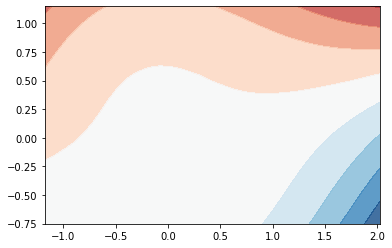

In [18]:
#Train a model with a polynomial kernel
#polynomial degree = 3
svclassifier_poly_3 = SVC(kernel= 'poly', degree=3)
svclassifier_poly_3.fit(train_features, train_labels)
test_pred = svclassifier_poly_3.predict(test_features)
print("The classifier report for linear kernel: \n" + classification_report(test_labels, test_pred))
print(confusion_matrix(test_labels, test_pred))
add_decision_boundary_to_plot(svclassifier_poly_3,test_df['feat_1'].min(), test_df['feat_1'].max(), test_df['feat_2'].min(), test_df['feat_2'].max() )

The classifier report for linear kernel: 
              precision    recall  f1-score   support

           0       1.00      0.80      0.89       147
           1       0.84      1.00      0.91       153

    accuracy                           0.90       300
   macro avg       0.92      0.90      0.90       300
weighted avg       0.92      0.90      0.90       300

[[118  29]
 [  0 153]]


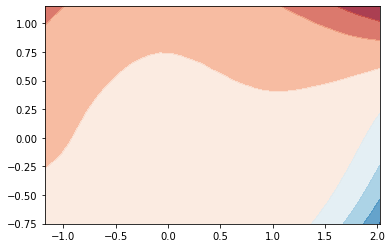

In [16]:
#Train a model with a polynomial kernel
#polynomial degree = 5
svclassifier_poly_5 = SVC(kernel= 'poly', degree=5)
svclassifier_poly_5.fit(train_features, train_labels)
test_pred = svclassifier_poly_5.predict(test_features)
print("The classifier report for linear kernel: \n" + classification_report(test_labels, test_pred))
print(confusion_matrix(test_labels, test_pred))
add_decision_boundary_to_plot(svclassifier_poly_5,test_df['feat_1'].min(), test_df['feat_1'].max(), test_df['feat_2'].min(), test_df['feat_2'].max() )

The classifier report for linear kernel: 
              precision    recall  f1-score   support

           0       0.94      0.62      0.75       147
           1       0.72      0.96      0.83       153

    accuracy                           0.79       300
   macro avg       0.83      0.79      0.79       300
weighted avg       0.83      0.79      0.79       300

[[ 91  56]
 [  6 147]]


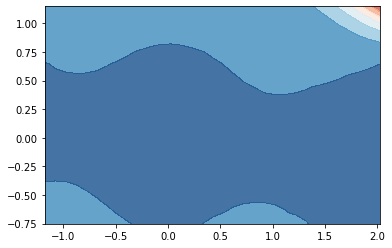

In [17]:
#Train a model with a polynomial kernel
#polynomial degree = 10
svclassifier_poly_10 = SVC(kernel= 'poly', degree=10)
svclassifier_poly_10.fit(train_features, train_labels)
test_pred = svclassifier_poly_10.predict(test_features)
print("The classifier report for linear kernel: \n" + classification_report(test_labels, test_pred))
print(confusion_matrix(test_labels, test_pred))
add_decision_boundary_to_plot(svclassifier_poly_10,test_df['feat_1'].min(), test_df['feat_1'].max(), test_df['feat_2'].min(), test_df['feat_2'].max() )

## 2) C and Gamma hyperparameters

The classifier report for rbf kernel: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       147
           1       0.99      0.95      0.97       153

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

[[145   2]
 [  7 146]]


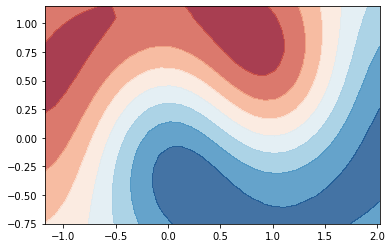

In [20]:
# c = 0.1
svclassifier_01 = SVC(C= 0.1, kernel= 'rbf')
svclassifier_01.fit(train_features, train_labels)
test_pred = svclassifier_01.predict(test_features)
print("The classifier report for rbf kernel: \n" + classification_report(test_labels, test_pred))
print(confusion_matrix(test_labels, test_pred))
add_decision_boundary_to_plot(svclassifier_01,test_df['feat_1'].min(), test_df['feat_1'].max(), test_df['feat_2'].min(), test_df['feat_2'].max() )

The classifier report for rbf kernel: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       147
           1       1.00      0.98      0.99       153

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

[[147   0]
 [  3 150]]


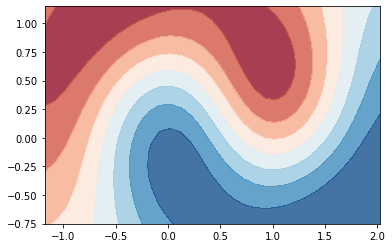

In [23]:
# c = 1
svclassifier_1 = SVC(C= 1, kernel= 'rbf', gamma= 'scale')
svclassifier_1.fit(train_features, train_labels)
test_pred = svclassifier_1.predict(test_features)
print("The classifier report for rbf kernel: \n" + classification_report(test_labels, test_pred))
print(confusion_matrix(test_labels, test_pred))
add_decision_boundary_to_plot(svclassifier_1,test_df['feat_1'].min(), test_df['feat_1'].max(), test_df['feat_2'].min(), test_df['feat_2'].max() )

The classifier report for rbf kernel: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       147
           1       1.00      0.99      1.00       153

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

[[147   0]
 [  1 152]]


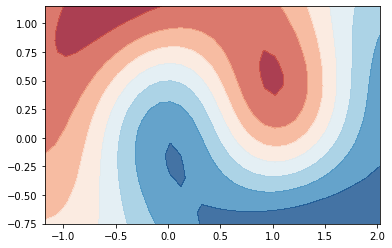

In [22]:
# c = 10
svclassifier_10 = SVC(C= 10, kernel= 'rbf')
svclassifier_10.fit(train_features, train_labels)
test_pred = svclassifier_10.predict(test_features)
print("The classifier report for rbf kernel: \n" + classification_report(test_labels, test_pred))
print(confusion_matrix(test_labels, test_pred))
add_decision_boundary_to_plot(svclassifier_10,test_df['feat_1'].min(), test_df['feat_1'].max(), test_df['feat_2'].min(), test_df['feat_2'].max() )

The classifier report for rbf kernel: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       147
           1       0.99      0.97      0.98       153

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

[[146   1]
 [  4 149]]


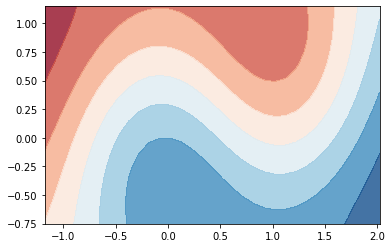

In [24]:
# c = 1 gamma = 'auto
svclassifier_1 = SVC(C= 1, kernel= 'rbf', gamma= 'auto')
svclassifier_1.fit(train_features, train_labels)
test_pred = svclassifier_1.predict(test_features)
print("The classifier report for rbf kernel: \n" + classification_report(test_labels, test_pred))
print(confusion_matrix(test_labels, test_pred))
add_decision_boundary_to_plot(svclassifier_1,test_df['feat_1'].min(), test_df['feat_1'].max(), test_df['feat_2'].min(), test_df['feat_2'].max() )